In [1]:
import pandas as pd                  #for data handling
import matplotlib.pyplot as plt      #for static plots    
import seaborn as sns                 #for statical visualizations
import plotly.express as px          #for interactive plots
import geopandas as gpd               #for geospatial data

In [3]:
df = pd.read_csv('full_grouped.csv')

In [5]:
#calling the df to display
df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [7]:
#inspect dataset structure
df.columns   #check column names
df.head()   
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [9]:
#checking ones that are just there for vibes
df.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [11]:
#clean data
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
# Filter for selected countries
countries = ['US', 'Australia', 'South Kora', 'China', 'South Africa']
unc_df_filtered = df[df['Country/Region'].isin(countries)]

In [21]:
# Drop rows with missing critical values
df_filtered = df.dropna(subset=['Confirmed', 'Deaths', 'Date'])

In [23]:
# Fill missing numeric data
num_cols = ['Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']
df_filtered[num_cols] = df_filtered[num_cols].fillna(0)

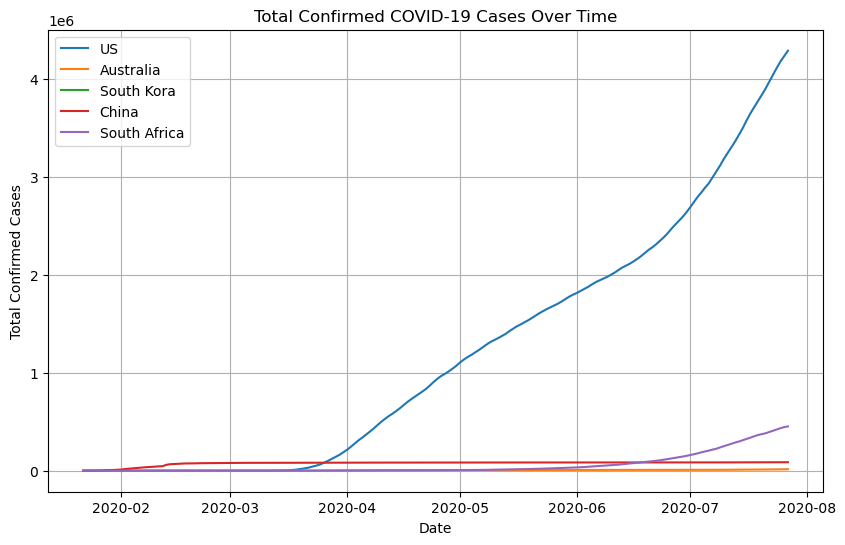

In [25]:
# 📈 Exploratory Data Analysis (EDA)
# Plot total confirmed cases over time
plt.figure(figsize=(10,6))
for country in countries:
    data = df_filtered[df_filtered['Country/Region'] == country]
    plt.plot(data['Date'], data['Confirmed'], label=country)
plt.title('Total Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()

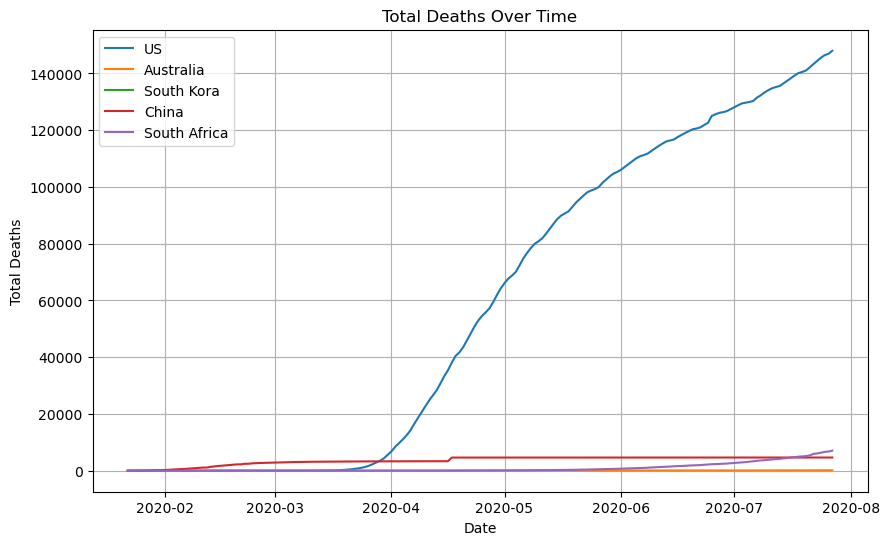

In [27]:
# Plot total deaths over time
plt.figure(figsize=(10,6))
for country in countries:
    data = df_filtered[df_filtered['Country/Region'] == country]
    plt.plot(data['Date'], data['Deaths'], label=country)
plt.title('Total Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.show()

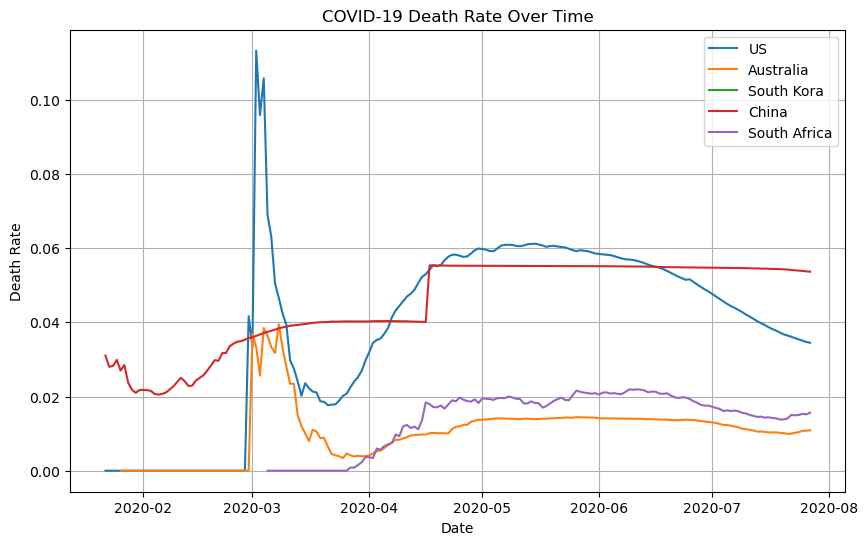

In [29]:
# Calculate and plot death rate over time (Deaths / Confirmed)
plt.figure(figsize=(10,6))
for country in countries:
    data = df_filtered[df_filtered['Country/Region'] == country].copy()
    data['Death Rate'] = data['Deaths'] / data['Confirmed']
    plt.plot(data['Date'], data['Death Rate'], label=country)
plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.grid(True)
plt.show()

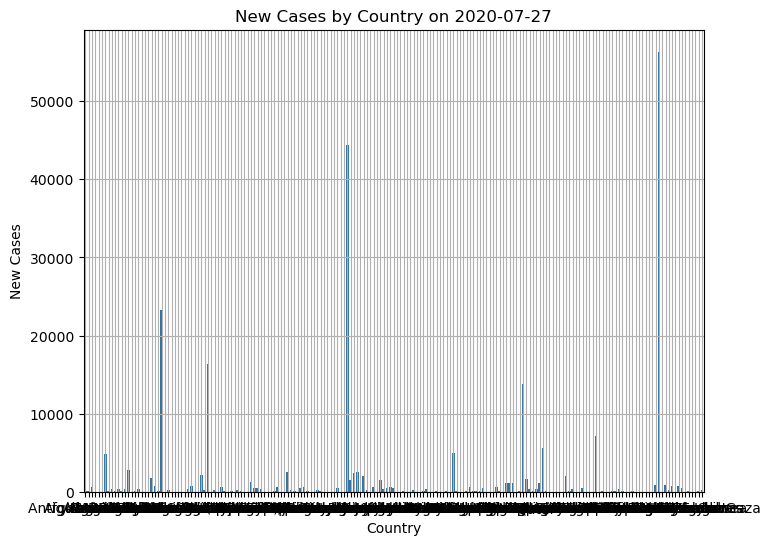

In [55]:
# Bar chart: Compare new cases by country (latest date)
latest_date = df_filtered['Date'].max()
latest_data = df_filtered[df_filtered['Date'] == latest_date]
plt.figure(figsize=(8,6))
sns.barplot(data=latest_data, x='Country/Region', y='New cases')
plt.title(f'New Cases by Country on {latest_date.date()}')
plt.xlabel('Country')
plt.ylabel('New Cases')
plt.grid(True)
plt.show()


In [39]:
import ipywidgets as widgets
from IPython.display import display

In [45]:
country_dropdown = widgets.Dropdown(
    options = df['Country/Region'].unique(),
    value = 'Kenya',
    description = 'Country'
)

In [49]:
min_date = df['Date'].min()
max_date = df['Date'].max()